In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [7]:
# Upload the file
from google.colab import files
uploaded = files.upload()

Saving wdbc.data to wdbc.data


In [8]:
# Load data
df = pd.read_csv('wdbc.data')

In [9]:
# View first 5 rows of the data
df.head()

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [10]:
# Split into feature and target variables
X = df.iloc[:, 2:] #features
Y = df.iloc[:, 1] #target

In [11]:
# Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

In [12]:
# Create a Decision Tree model
model = DecisionTreeClassifier(random_state=10, min_samples_split=2, criterion='gini')
model.fit(X_train, Y_train)

# preddict Y-value
y_pred_decision_tree = model.predict(X_test)

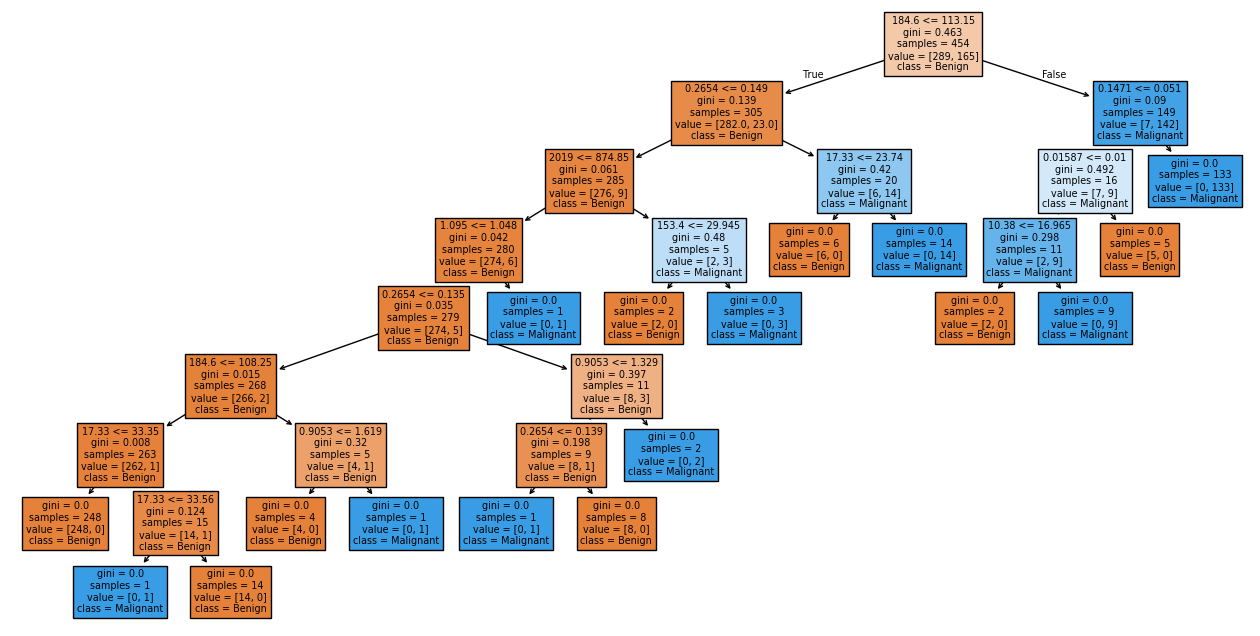

In [13]:
# Visualize the Decision Tree
plt.figure(figsize=(16, 8))
plot_tree(model, feature_names=X.columns, class_names=['Benign', 'Malignant'], filled=True)
plt.show()
##### The basic decision tree may overfit.

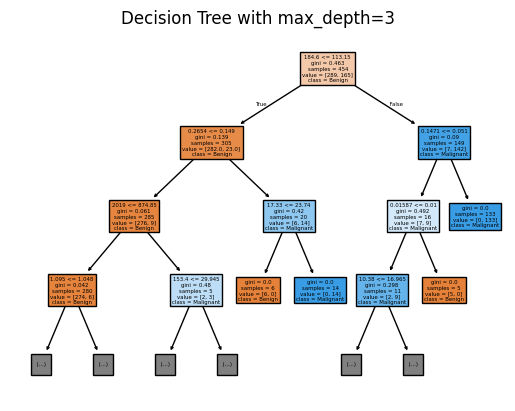

In [14]:
plot_tree(model, feature_names=X.columns, class_names=['Benign', 'Malignant'], filled=True, max_depth=3)
plt.title("Decision Tree with max_depth=3")
plt.show()
#Less complex, easier to interpret.

In [15]:
# Train random forest model
clf = RandomForestClassifier(random_state=10)

In [16]:
# Extract feature importances
importances = model.feature_importances_

In [17]:
# Print feature importance

# Create a DataFrame for easier viewing
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

     Feature  Importance
22     184.6    0.735818
27    0.2654    0.095038
21     17.33    0.049472
7     0.1471    0.026026
17   0.01587    0.021909
11    0.9053    0.019926
23      2019    0.015656
1      10.38    0.015580
13     153.4    0.011425
10     1.095    0.009150
5     0.2776    0.000000
4     0.1184    0.000000
3       1001    0.000000
0      17.99    0.000000
12     8.589    0.000000
6     0.3001    0.000000
8     0.2419    0.000000
9    0.07871    0.000000
2      122.8    0.000000
16   0.05373    0.000000
15   0.04904    0.000000
14  0.006399    0.000000
20     25.38    0.000000
19  0.006193    0.000000
18   0.03003    0.000000
24    0.1622    0.000000
25    0.6656    0.000000
26    0.7119    0.000000
28    0.4601    0.000000
29    0.1189    0.000000


In [18]:
# Build and train an AdaBoostClassifier on your training data.
adaboost_clf = AdaBoostClassifier(random_state=10, n_estimators=50)
adaboost_clf.fit(X_train, Y_train)

# AdaBoost
Y_pred_adaboost = adaboost_clf.predict(X_test)

In [20]:
# Evaluate models

# Decision Tree metrics
print("Decision Tree Accuracy:", accuracy_score(Y_test, y_pred_decision_tree))
# print("Decision Tree Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_decision_tree))
# print("Decision Tree Classification Report:\n", classification_report(Y_test, y_pred_decision_tree))

# AdaBoost metrics
print("AdaBoostClassifier Accuracy:", accuracy_score(Y_test, Y_pred_adaboost))
# print("AdaBoostClassifier Confusion Matrix:\n", confusion_matrix(y_test, y_pred_adaboost))
# print("AdaBoostClassifier Classification Report:\n", classification_report(y_test, y_pred_adaboost))

Decision Tree Accuracy: 0.9122807017543859
AdaBoostClassifier Accuracy: 0.9385964912280702
